# **Sobre o conjunto de dados** <p>
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

[Download da base de dados](https://www.kaggle.com/ramjasmaurya/unicorn-startups)


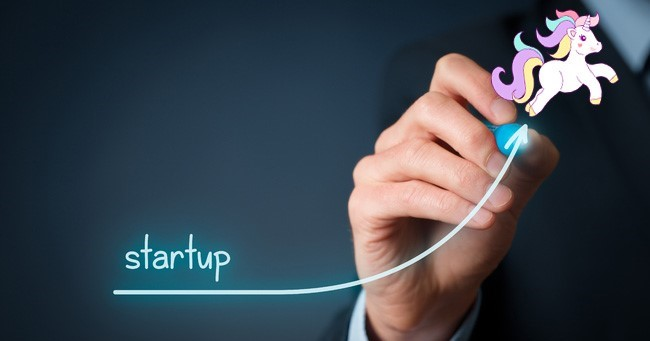

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Ler os dados
base_dados = pd.read_csv(r"C:\Users\Joao Paulo\OneDrive\Documents\Python_para_Analise_de_Dados_Data_Viking\Startups+in+2021+end.csv")

In [3]:
base_dados.shape

(936, 8)

In [4]:
# Ler os primeiros registros

base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [5]:
# Colunas

base_dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [6]:
# Renomeando as colunas
base_dados = base_dados.rename(columns={
    'Unnamed: 0': "ID",
    'Company': 'Empresa',
    'Valuation ($B)': 'Valor ($)',
    'Date Joined': 'Data de Adesão',
    'Country': 'Pais',
    'City': 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores'
})

In [8]:
# Verificando o tipo dos dados
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [10]:
# Contando a quantidade de registros nulos em cada coluna
base_dados.isnull().sum()

ID                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

<Axes: title={'center': 'Analisando os campos nulos'}>

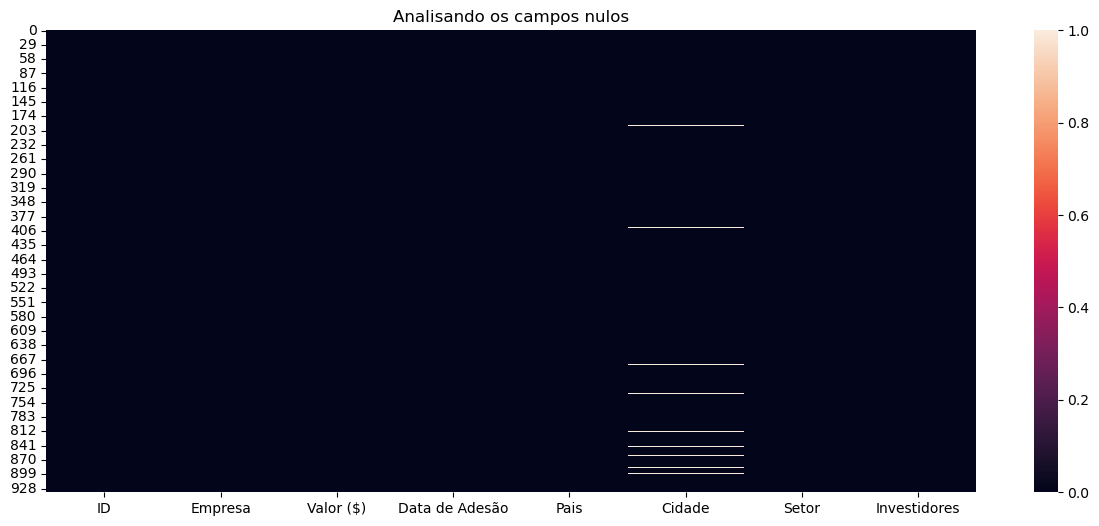

In [14]:
# Visão gráfica
plt.figure(figsize=(15,6))
plt.title("Analisando os campos nulos")
sns.heatmap(base_dados.isnull())

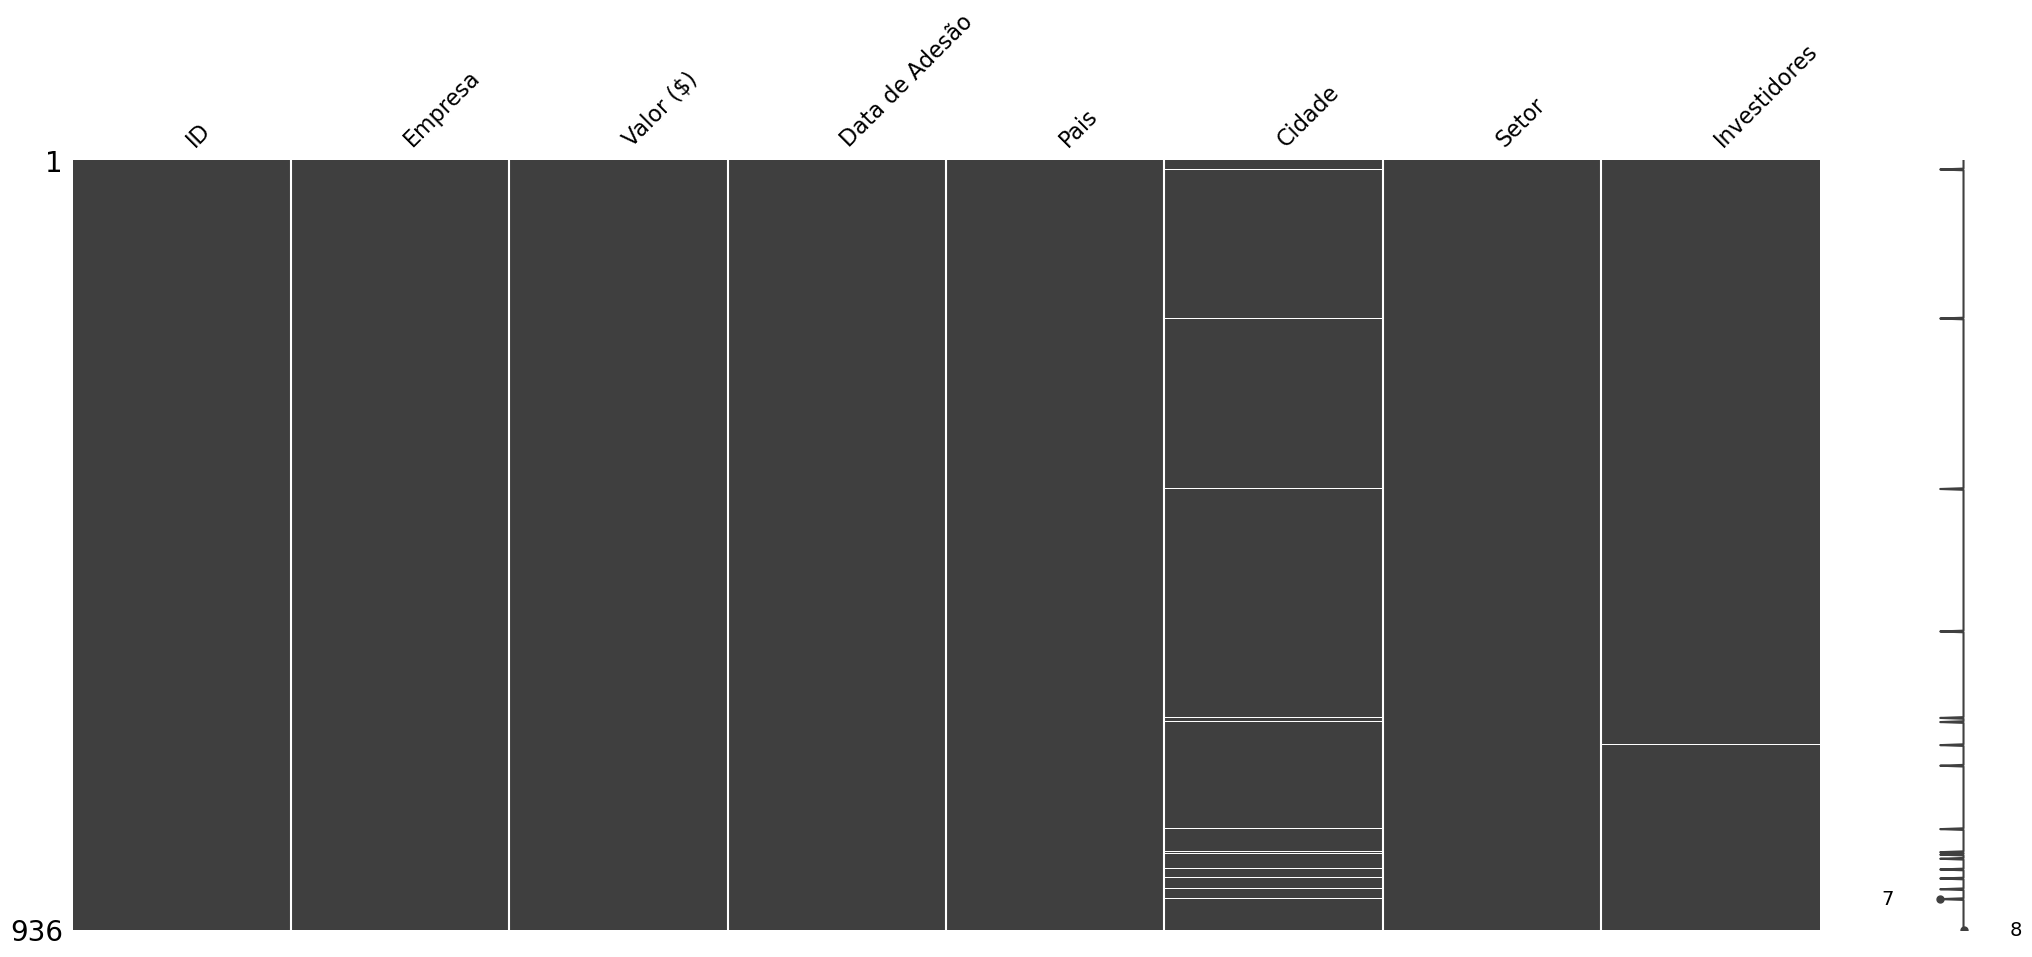

In [15]:
# Outra opção para analisar valores nulos é a biblioteca missingno
missingno.matrix(base_dados);

In [19]:
# Verificando a quantiade de valores únicos em cada campo
base_dados.nunique()

ID                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [20]:
# Verificando os valores únicos em cada coluna
base_dados["Setor"].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [24]:
# Valores únicos - rank (pega os valores únicos em cada campo e conta a quantidade de registros)
base_dados["Setor"].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [23]:
# Valores únicos - rank (pega os valores únicos em cada campo e conta a quantidade de registros)
base_dados["Setor"].value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

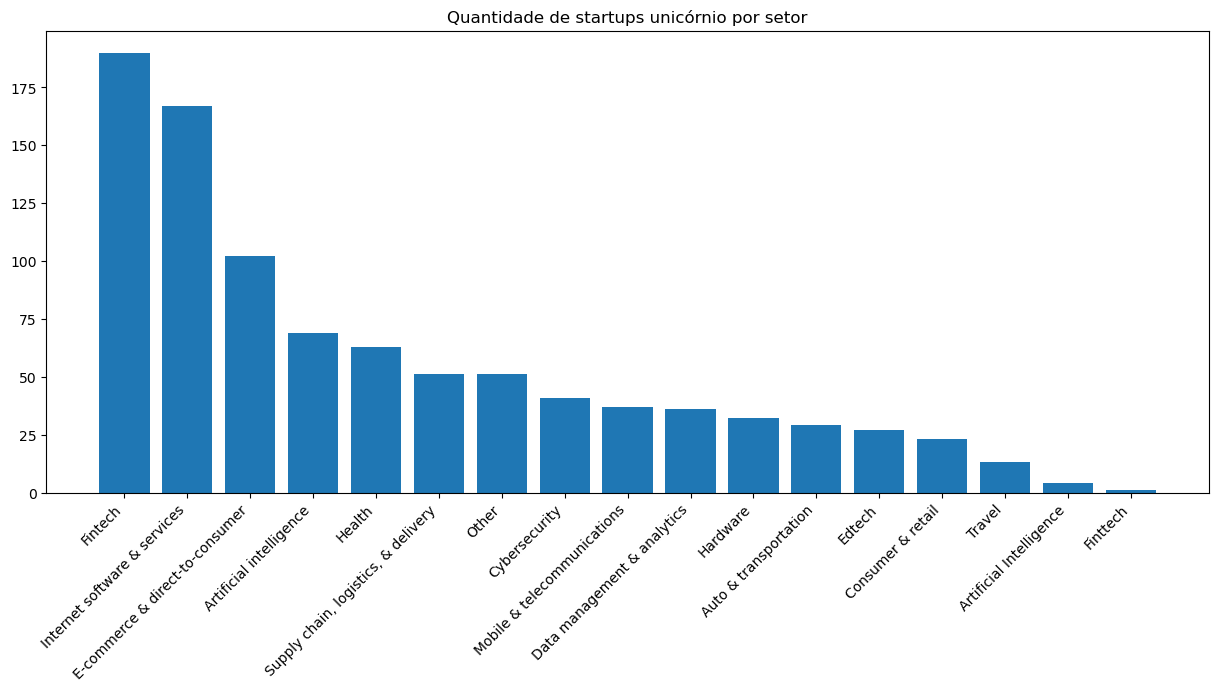

In [36]:
plt.figure(figsize=(15,6))
plt.title("Quantidade de startups unicórnio por setor")
plt.bar(base_dados["Setor"].value_counts().index, base_dados["Setor"].value_counts())
plt.xticks(rotation=45, ha="right");

In [30]:
analise = round(base_dados["Pais"].value_counts(normalize=True) * 100, 1)

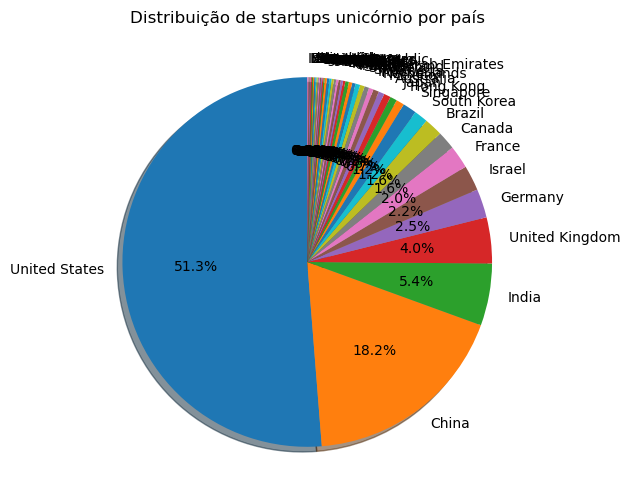

In [33]:
# Plot geral dos países
plt.figure(figsize=(15,6))
plt.title("Distribuição de startups unicórnio por país")
plt.pie(analise,
        labels = analise.index,
        shadow=True,
        startangle=90,
        autopct='%1.1f%%');

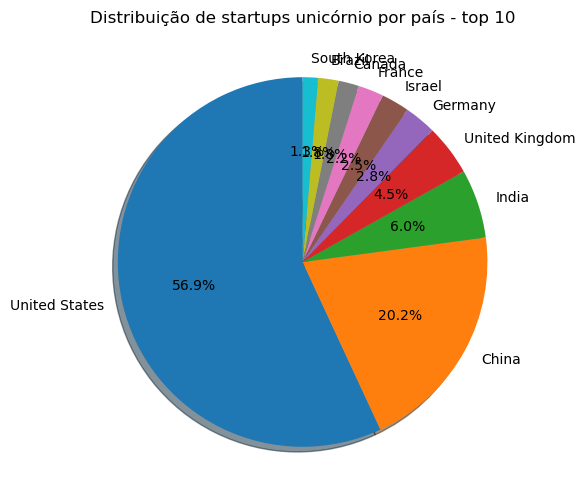

In [35]:
# Plot top 10 dos países
plt.figure(figsize=(15,6))
plt.title("Distribuição de startups unicórnio por país - top 10")
plt.pie(analise.head(10),
        labels = analise.index[0:10],
        shadow=True,
        startangle=90,
        autopct='%1.1f%%');

In [38]:
# Conversão para data
base_dados['Data de Adesão'] = pd.to_datetime(base_dados['Data de Adesão'], errors="coerce")
base_dados['Data de Adesão']

0     2017-04-07
1     2012-12-01
2     2014-01-23
3     2011-12-12
4     2018-01-08
         ...    
931   2021-12-06
932   2021-12-07
933   2021-12-01
934   2021-12-01
935   2021-12-07
Name: Data de Adesão, Length: 936, dtype: datetime64[ns]

In [39]:
# Extrair o ano e o mês
base_dados["Mes"] = pd.DatetimeIndex(base_dados['Data de Adesão']).month
base_dados["Ano"] = pd.DatetimeIndex(base_dados['Data de Adesão']).year
base_dados.head()

,ID,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [56]:
# Tabela analítica (utilizando o método reset_index())
analise_agrupada = base_dados.groupby(by=["Pais", "Ano", "Mes", 'Empresa']).agg({
    "ID": "count"
}).reset_index()

In [57]:
analise_agrupada.head()

,Pais,Ano,Mes,Empresa,ID
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1


In [58]:
analise_agrupada.loc[analise_agrupada["Pais"] == "Brazil"].reset_index(drop=True)

,Pais,Ano,Mes,Empresa,ID
0,Brazil,2018,3,Nubank,1
1,Brazil,2018,7,Movile,1
2,Brazil,2018,11,iFood,1
3,Brazil,2019,6,Loggi,1
4,Brazil,2019,9,QuintoAndar,1
5,Brazil,2019,10,EBANX,1
6,Brazil,2019,12,Wildlife Studios,1
7,Brazil,2020,1,Loft,1
8,Brazil,2020,12,C6 Bank,1
9,Brazil,2020,12,Creditas,1


In [59]:
# Tratando a coluna do valor
base_dados["Valor ($)"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 936 entries, 0 to 935
Series name: Valor ($)
Non-Null Count  Dtype  
--------------  -----  
936 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [ ]:
base_dados["Valor ($)"] = base_dados["Valor ($)"].apply(lambda linha: linha.replace("$", ""))
base_dados["Valor ($)"] = pd.to_numeric(base_dados["Valor ($)"])

base_dados.head()

Quanto o setor de fintech vale?
Qual o valor de cada país?

In [ ]:
# Tabela analítica (utilizando o método reset_index())
analise_agrupada_valor = base_dados.groupby(by=["Pais"]).agg({
    "Valor ($)": "sum"
}).reset_index().sort_index("Valor ($)")

In [72]:
analise_agrupada_valor_pais = analise_agrupada_valor.sort_values(["Valor ($)"], ascending=[False]).reset_index(drop=True)
analise_agrupada_valor_pais.head()


,Pais,Valor ($)
0,United States,1604.03
1,China,569.48
2,United Kingdom,150.29
3,India,148.45
4,Germany,66.63


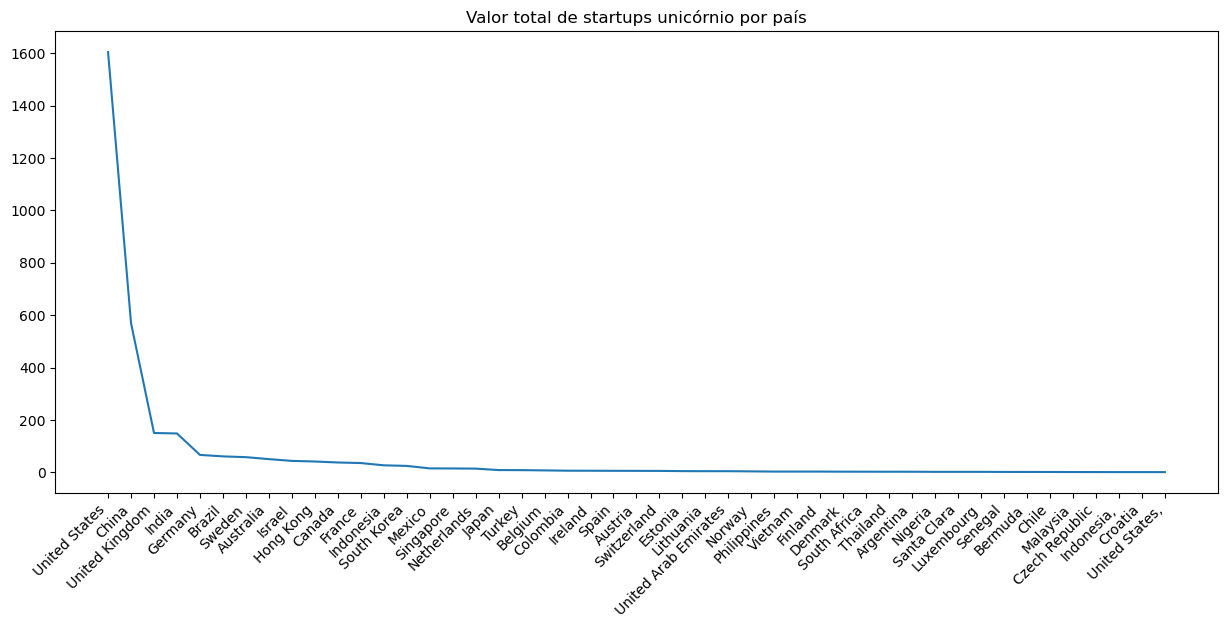

In [74]:
plt.figure(figsize=(15,6))
plt.plot(analise_agrupada_valor_pais["Pais"], analise_agrupada_valor_pais["Valor ($)"])
plt.title("Valor total de startups unicórnio por país")
plt.xticks(rotation=45, ha="right");